In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
ITERATIONS = 10
algos = ['RLS', '(1+1)-EA', '(1+2)-EA', '(1+10)-EA', '(1+20)-EA', '(1+50)-EA']
iter_cols = ['iteration-' + str(1 + i) for i in range(ITERATIONS)]

In [76]:
df = pd.read_csv('results.csv')
df['mean'] = df[iter_cols].sum(axis=1) / ITERATIONS
df

,algorithm,test-function,n,iteration-1,iteration-2,iteration-3,iteration-4,iteration-5,iteration-6,iteration-7,iteration-8,iteration-9,iteration-10,mean
0,RLS,one_max,25,61,90,102,167,69,91,62,65,51,148,90.6
1,RLS,one_max,50,146,193,179,197,201,199,181,161,161,148,176.6
2,RLS,one_max,75,263,287,320,390,241,310,403,178,342,288,302.2
3,RLS,one_max,100,385,333,366,410,425,475,363,364,470,453,404.4
4,RLS,one_max,125,720,622,590,463,510,487,492,541,381,608,541.4
5,RLS,jump,25,519,5958,761,3087,1272,746,1249,993,1719,885,1718.9
6,RLS,jump,50,12871,834,79097,27590,51787,35318,99998,7441,46924,3665,36552.5
7,RLS,jump,75,237598,18419,4949,37697,85293,14655,94607,18037,232229,9305,75278.9
8,RLS,jump,100,469260,1575,181244,59331,65606,91316,105075,36714,51966,66125,112821.2
9,RLS,jump,125,4233,151646,88683,91915,330349,354062,1679062,485831,312145,510034,400796.0


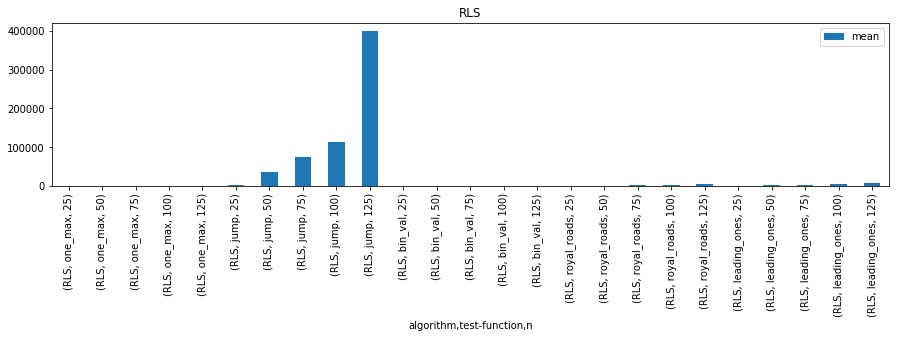

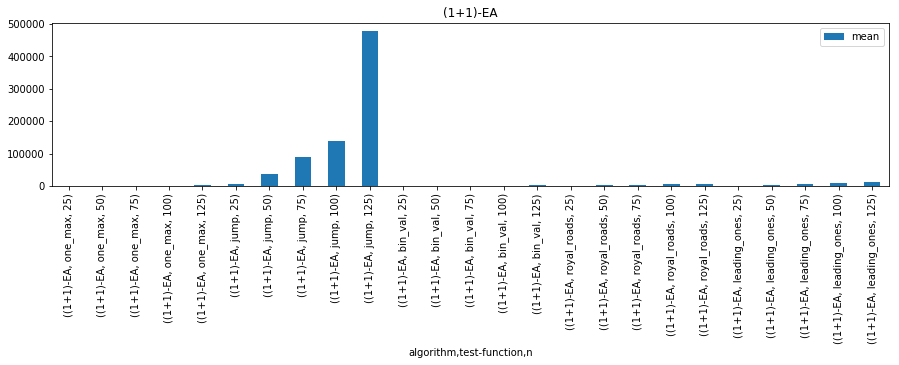

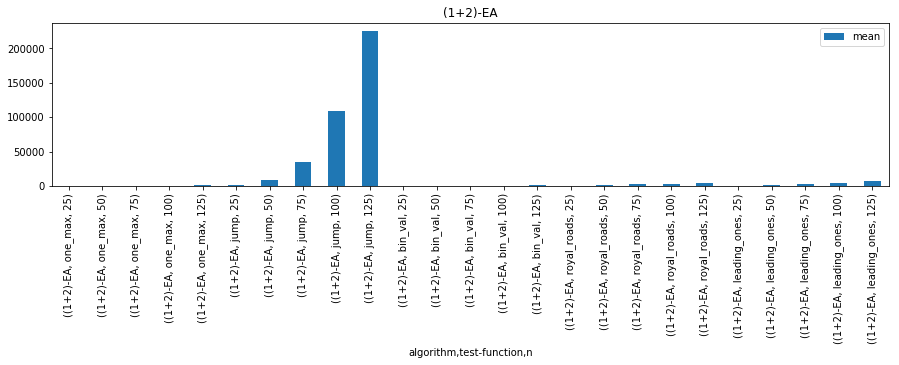

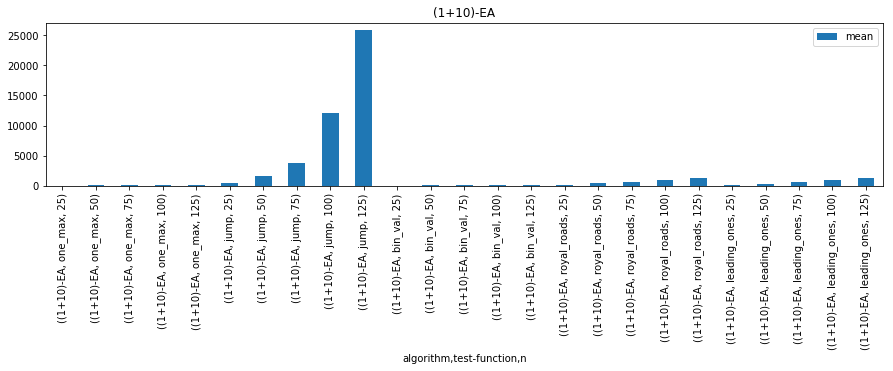

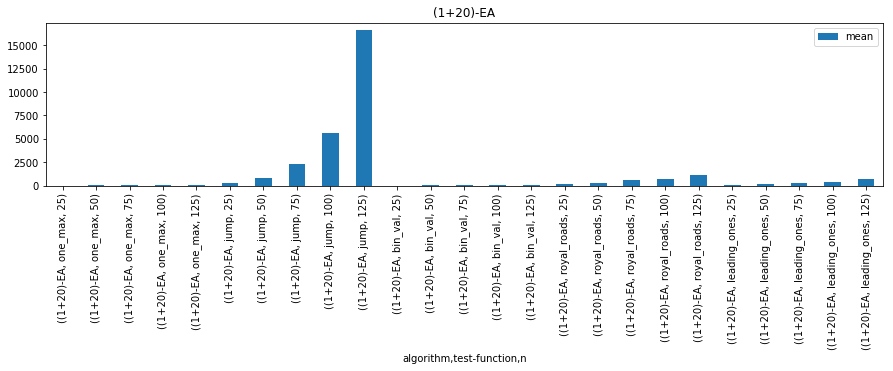

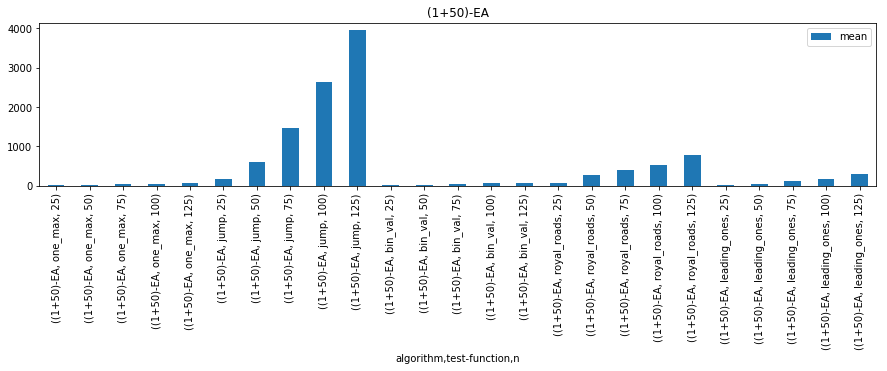

In [78]:
for algo_name in algos:
    df.set_index(['algorithm', 'test-function', 'n']).xs(level='algorithm', key=algo_name, drop_level=False)[['mean']].plot.bar(title=algo_name,figsize=(15,3))
    plt.show()

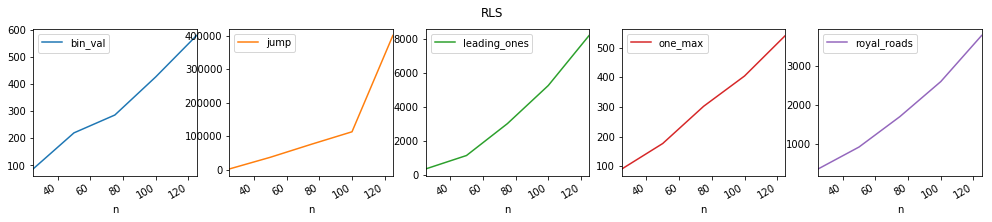

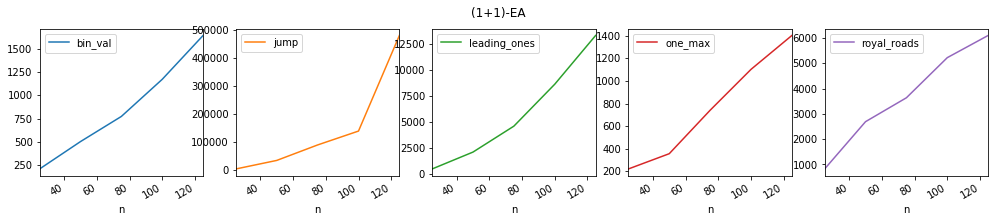

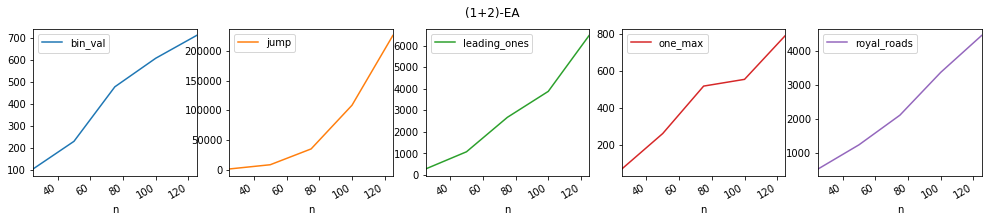

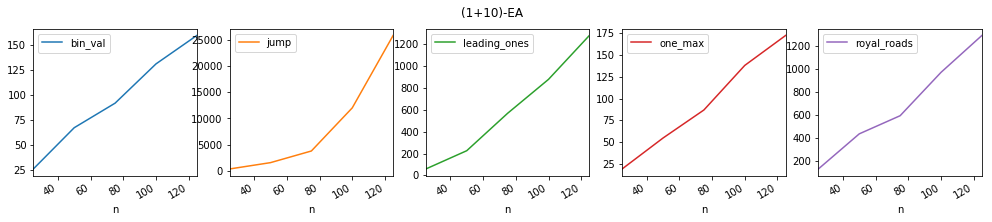

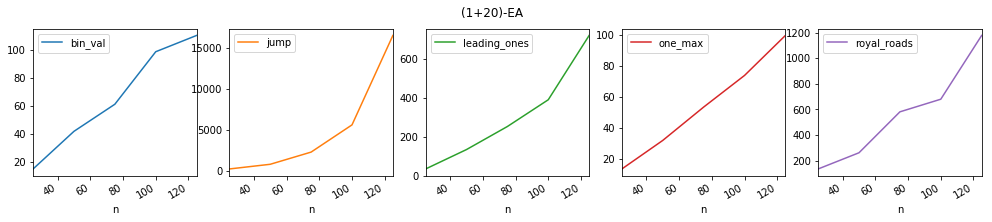

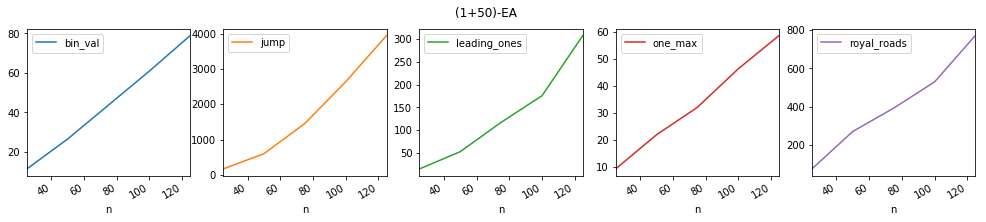

In [79]:
for algo_name in algos:
    df_algo = df[df['algorithm'] == algo_name]
    pivot = pd.pivot_table(df_algo,
                           values='mean',
                           index=['n'],
                           columns='test-function')
    pivot.plot(subplots=True, layout=(1,5), figsize=(17,3), title=algo_name)
    plt.show()